# Problema do XOR

Vamos simular aqui dois problemas de classificação:
- Linearmente separável
- Não linearmente separável (problema do XOR)

Na primeira etapa tentaremos solucionar o problema com um modelo neural bem simples, contendo apenas um único perceptron. Na etapa 2 implementaremos um Multi-Layer Perceptron (MLP) contendo uma camada escondida.

O objetivo é analisar o comportamento de ambos os modelos para mostrar a limitação do Perceptron e ao mesmo tempo como MLPs são efetivos para problemas não lineares.


## Etapa 1: Perceptron

![](https://drive.google.com/uc?export=view&id=1S-tCAA5sZ1aRY5TjmA4FRztmJzVP3kh3)


### Definindo o nosso modelo de classificação. Uma rede simples com uma única unidade neural.

In [0]:
from torch.autograd import Variable
import torch.nn as nn
import torch

class Perceptron(nn.Module):

  def __init__(self):
    super(Perceptron, self).__init__()
    
    # nn.Linear(dimensão da entrada, dimensão da saída)
    self.linear = nn.Linear(2, 1)
    self.activation = nn.Sigmoid()
    
  def forward(self, x):
    output = self.activation(self.linear(x))
    return output

### Função auxiliar para plot da fronteira de decisão do classificador.

In [0]:
def plot_boundary(X, y, model):
  x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
  y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
  
  spacing = min(x_max - x_min, y_max - y_min) / 100
  
  XX, YY = np.meshgrid(np.arange(x_min, x_max, spacing),
                       np.arange(y_min, y_max, spacing))
  
  data = np.hstack((XX.ravel().reshape(-1,1), 
                    YY.ravel().reshape(-1,1)))
  
  # For binary problems
  db_prob = model(Variable(torch.Tensor(data)).cuda() )
  clf = np.where(db_prob.cpu().data < 0.5,0,1)
  
  # For multi-class problems
  db_prob = model(torch.Tensor(data).to(device) )
  clf = np.argmax(db_prob.cpu().data.numpy(), axis=-1)
  
  Z = clf.reshape(XX.shape)
  
  plt.contourf(XX, YY, Z, cmap=plt.cm.bwr, alpha=0.5)
  plt.scatter(X[:,0], X[:,1], c=y[:,0], edgecolors='k', s=25)


### Função para treinamento do modelo e visualização dos resultados.

In [0]:
import pandas as pd

def train(X, Y, size=60):
  
  #### Nesse momento definimos o tamanho da entrada
  #### e o número de unidades da camada neural.
  p = Perceptron().cuda()

  Xt = Variable(torch.Tensor(X)).cuda()
  Yt = Variable(torch.Tensor(Y)).cuda()

  criterion = nn.L1Loss().cuda()
  optimizer = torch.optim.Adam(p.parameters(), lr=1e-2)

  num_epochs = 1000
  for epoch in range(num_epochs):

    p.train()

    output = p(Xt)
    loss = criterion(output, Yt)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


  out = p(Xt)
  plot_boundary(X, Y, p, size)

  
  
  

### Gerando dados linearmente separáveis

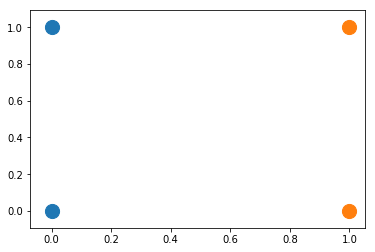

In [0]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

class_A = np.array([[0,0], [0,1]])
class_B = np.array([[1,1], [1,0]])

X = np.append(class_A, class_B, axis=0)
Y = np.expand_dims(np.array([0,0,1,1]), axis=-1)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(class_A[:,0], class_A[:,1], s=200)
ax.scatter(class_B[:,0], class_B[:,1], s=200)

### Chamando a função de treinamento

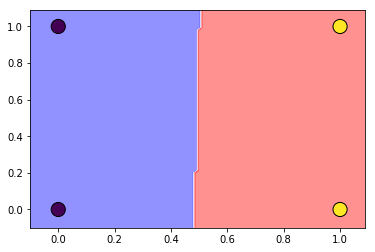

In [0]:
train(X, Y, size=200)

### Gerando dados não linearmente separáveis (Problema do XOR)

Text(0.5, 0, 'x1')

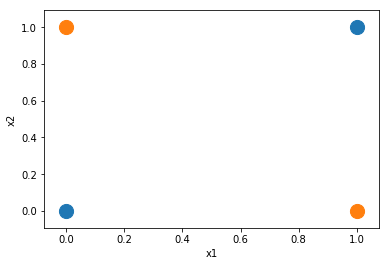

In [0]:
class_A = np.array([[0,0], [1,1]])
class_B = np.array([[0,1], [1,0]])

X = np.append(class_A, class_B, axis=0)
Y = np.expand_dims(np.array([0,0,1,1]), axis=-1)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(class_A[:,0], class_A[:,1], s=200)
ax.scatter(class_B[:,0], class_B[:,1], s=200)
ax.set_ylabel('x2')
ax.set_xlabel('x1')

### Chamando a função de treinamento

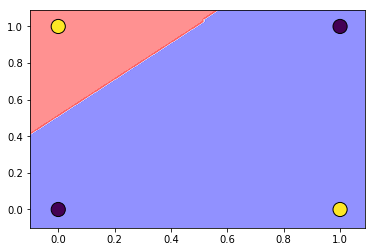

In [0]:
train(X, Y,size=200)

## Etapa 2: Multi-Layer Perceptron

Definindo modelo neural com uma camada escondida e uma camada de saída, adicionando uma ativação não linear na camada escondida.  Essas características atendem os requisitos mínimos do Teorema de Aproximação Universal.

![](https://drive.google.com/uc?export=view&id=1LgOdmGBJT_BUjfTzH9EVi26HAJ9LFH-Y)


In [0]:
from torch.autograd import Variable
import torch.nn as nn
import torch

class Perceptron(nn.Module):

  def __init__(self):
    super(Perceptron, self).__init__()
    
    # nn.Linear(dimensão da entrada, dimensão da saída)
    self.linear_hidden = nn.Linear(2, 3)
    self.linear_out    = nn.Linear(3, 1)
    self.activation    = nn.Sigmoid()
    
  def forward(self, x):
    feature = self.activation(self.linear_hidden(x))
    output  = self.activation(self.linear_out(feature))
    
    return output

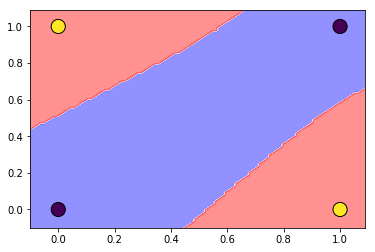

In [0]:
train(X, Y, size=200)